1) [3v] Compare the performance of 𝑘NN with 𝑘 =5 and naïve Bayes with Gaussian assumption 
(consider all remaining parameters for each classifier as sklearn’s default): 

a. Plot two boxplots with the fold accuracies for each classifier.

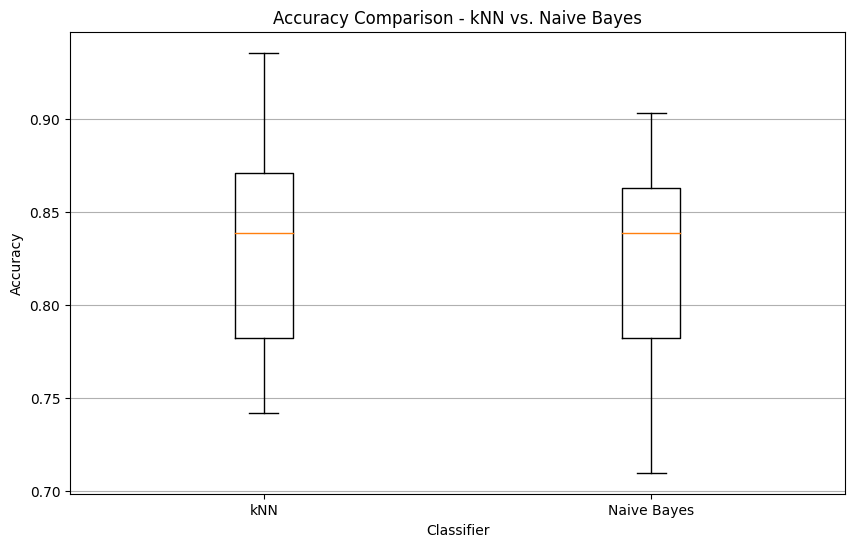

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from scipy.io.arff import loadarff


data = loadarff('column_diagnosis.arff')
df = pd.DataFrame(data[0])

x = (df.iloc[:, :-1]).astype(np.float64)
y = (df.iloc[:, -1]).astype(str)

# Defenition of the models
knn = KNeighborsClassifier(n_neighbors=5)
nb = GaussianNB()

# Cross validation
cross_v = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)

# KNN
knn_scores = cross_val_score(knn, x, y, cv=cross_v, scoring='accuracy')

# Naive Bayes
nb_scores = cross_val_score(nb, x, y, cv=cross_v, scoring='accuracy')

scores = [knn_scores, nb_scores]
labels = ['kNN', 'Naive Bayes']

plt.figure(figsize=(10, 6))
plt.boxplot(scores, labels=labels)
plt.title('Accuracy Comparison - kNN vs. Naive Bayes')
plt.ylabel('Accuracy')
plt.xlabel('Classifier')
plt.grid(axis='y')
plt.show()


b. Using scipy, test the hypothesis “𝑘NN is statistically superior to naïve Bayes regarding 
accuracy”, asserting whether is true.